In [17]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tcheading">Table Of Contents</h1>
<div id ="toc"></div>

# Naive Bayes Classifier Problem

## Background

Only modify main.py above plumbing. This is a Naive Bayes Problem. Feel free to look at the rest of the stuff.

**Task**:
* Binary classifier has been written (and obfuscated)
* Classifier takes two dimensional input
* Model, when trained on "SQUASHED" set, obtains 1-2% training error

**Problem**
* No proper cross-validation for accuracy metric - only 50% accuracy on testing set
* Classifier is assumed to use categorical approach (which is terrible)
    * Having badly written code in a respository which cannot be understood is a bad business decision, assuming that the time to write (or re-write) important production code is small
* Use machine learning fundamentals knowlege + meta-algorithms and data processing to allow the original classifier as written to work

**Constraints**
* Only modify main.py above "Plumbing" comment
* Focus on 'train' and 'predict' functions
* Only use numpy + core python
* Code should call at least once, 'train' and 'predict'
    * original 'train' and 'predict' currently just pass data to the bayes classifier
* Aim for lowest error values on test data as possible
    * At most 15% average is good goal

**Submit**
* main.py and 3-4 sentence description of exercise. If >2 hours, submit longer description of analysis, approaches tried, best results, and next steps.

## Notes
Naive Bayes will overfit if the data is collinear (nerd-speak for linearly related). For multicollinear data, we may be able to use linear regression and obtain the varience from the data to compare things that are not correllated.

Additionally, we could explore other classifiers, which might be more appropriate for this data set, but I have not explored this to follow "the rules"

This is a feature engineering problem, since we cannot change the categorical nature of Naive Bayes under the hood. We are told that the classifier is using a categorical Naive Bayes approach under the hood.The code is obfuscated, so its tough to see how the catigorization is actually being done.


# Data Exploration
My first thought regarding the issue of a naive bayes classifier being "too accurate" is that that training data and the testing data are too similar. Another possibility is that the features are highly correllated. Thus, we extract the raw features from the text-file, and observe them.

Note that while the directions say that we should not use external python libraries in the solution, we are under no constraint to do so while exploring the data, =).

In [18]:
% matplotlib inline
import matplotlib.pyplot as plt
import mnbayes as classifier
import numpy as np
import random as rand
from math import log
from math import fabs
import seaborn
import scipy.stats as st

def get_feature_arrays(filename):
    val1 = []
    val2 = []
    
    # Labled Dictionary of Features
    # label (0) - np_array
    # label {1} - np_array
    features = {0:([],[]),1:([],[])}
    with open(filename,'r') as in_file:
        for line in in_file.readlines():
            values = line.split(',')
            (data,label) = values[1].split(':')
            data_1 = float(values[0])
            data_2 = float(data)
            label = int(label)
            features[label][0].append(data_1)
            features[label][1].append(data_2)
    data_0_x = np.array(features[0][0])
    data_0_y = np.array(features[0][1])
    data_1_x = np.array(features[1][0])
    data_1_y = np.array(features[1][1])
    return (data_0_x,data_0_y,data_1_x,data_1_y)

def plot_labeled_data(data_0_x,data_0_y,data_1_x,data_1_y):
    plt.scatter(data_1_x,data_1_y,color='red')
    plt.scatter(data_0_x,data_0_y,color='blue')
    plt.title('Feature Y vs Feature X, Label 0: blue, Label 1: red')
    plt.figure(figsize=(8,8))
    plt.show()

    plt.scatter(data_1_x,data_1_y,color='pink')
    plt.scatter(data_0_x,data_0_y,color='pink')
    plt.title('Feature Y vs Feature X, no labels')
    plt.figure(figsize=(8,8))
    plt.show()

    
    plt.hist(data_1_x)
    plt.title('Distribution Feature X, Label 1')
    plt.figure(figsize=(8,8))
    plt.show()

    plt.hist(data_1_y)
    plt.title('Distribution Feature Y, Label 1')
    plt.figure(figsize=(8,8))
    plt.show()

    plt.hist(data_0_x)
    plt.title('Distribution Feature X, Label_0')
    plt.figure(figsize=(8,8))
    plt.show()

    plt.hist(data_0_y)
    plt.title('Distribution Feature Y, Label 0')
    plt.figure(figsize=(8,8))   
    plt.show()

    plt.scatter(data_0_x,data_1_x,color='green')
    plt.scatter(data_0_y,data_1_y,color='orange')
    plt.title('Correlation Between Features')
    plt.xlabel('Label: 0')
    plt.ylabel('Label: 1')
    plt.figure(figsize=(8,8))
    plt.show()    




# The SQUASHED Data Set

Loading Testing/Training Data:


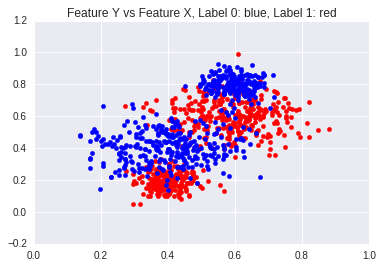

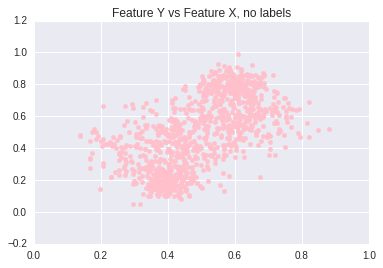

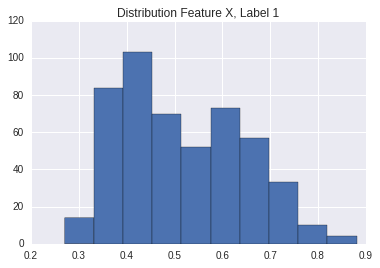

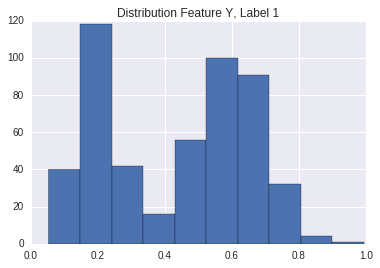

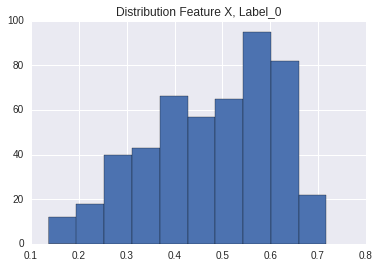

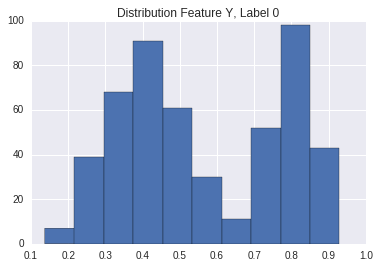

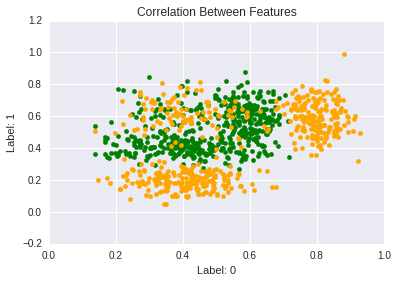

LinregressResult(slope=1.1262379672711043, intercept=-0.14336764905990512, rvalue=0.66667471581676641, pvalue=1.4560340606393651e-65, stderr=0.056423634905872246)
LinregressResult(slope=1.0496038850691023, intercept=0.060452563983365293, rvalue=0.67068451858856304, pvalue=1.293229166675105e-66, stderr=0.052017056679270889)
0.477709901805
0.134551632473
0.561858732854
0.210569816765
0.515339663834
0.127272695371
0.437027446391
0.215006416656


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c76c19f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c76a80750>]], dtype=object)

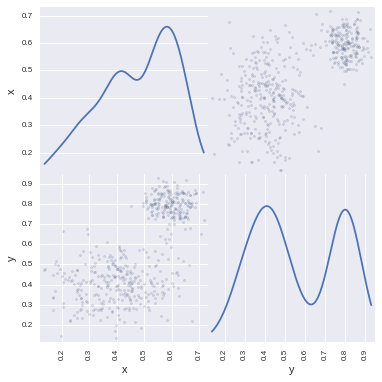

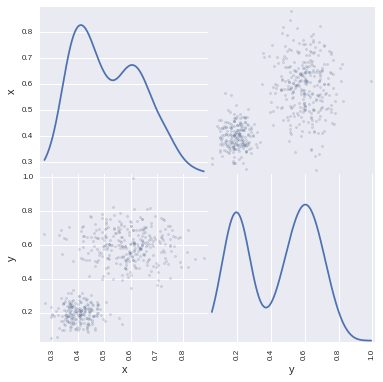

In [19]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

print "Loading Testing/Training Data:"
(data_0_x,data_0_y,data_1_x,data_1_y)= get_feature_arrays('SQUASHED')
plot_labeled_data(data_0_x,data_0_y,data_1_x,data_1_y)
print st.linregress(data_1_x,data_1_y)
print st.linregress(data_0_x,data_0_y)
# Concatenate both arrays for x and y to check for correlation (there is obviously corellation)

df_0 = pd.DataFrame({'x':data_0_x,'y':data_0_y})
df_1 = pd.DataFrame({'x':data_1_x,'y':data_1_y})

# Statistics
data_0_x_mean = data_0_x.mean()
data_0_x_std_dev = data_0_x.std()
data_0_y_mean = data_0_y.mean()
data_0_y_std_dev = data_0_y.std()

data_1_x_mean = data_1_x.mean()
data_1_x_std_dev = data_1_x.std()
data_1_y_mean = data_1_y.mean()
data_1_y_std_dev = data_1_y.std()


# print "Loading XOR Data:"
# (data_0_x,data_0_y,data_1_x,data_1_y)= get_feature_arrays('XOR')
# plot_labeled_data(data_0_x,data_0_y,data_1_x,data_1_y)

# Show 'em
print data_0_x_mean
print data_0_x_std_dev
print data_0_y_mean
print data_0_y_std_dev

print data_1_x_mean
print data_1_x_std_dev
print data_1_y_mean
print data_1_y_std_dev

scatter_matrix(df_0, alpha=0.2, figsize=(6, 6), diagonal='kde')
scatter_matrix(df_1, alpha=0.2, figsize=(6, 6), diagonal='kde')
 

# The XOR Data Set

Loading Testing/Training Data:


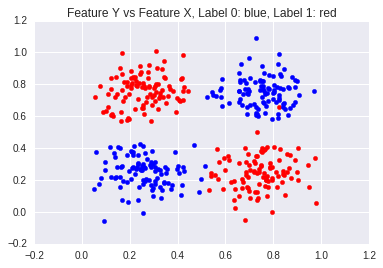

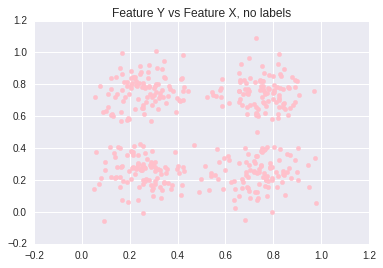

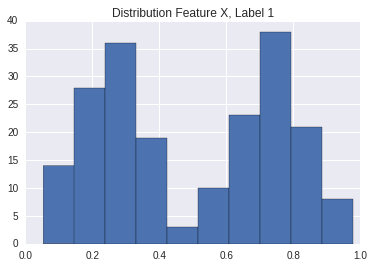

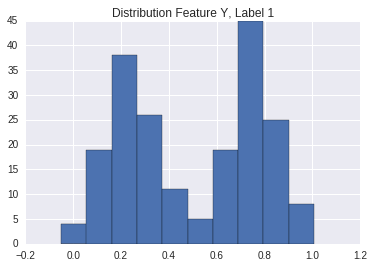

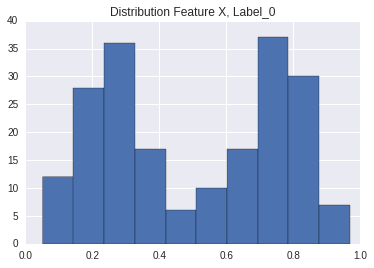

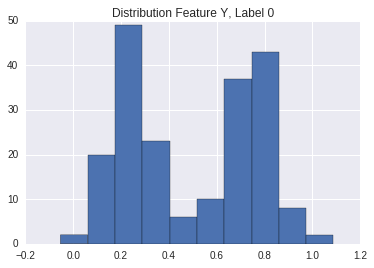

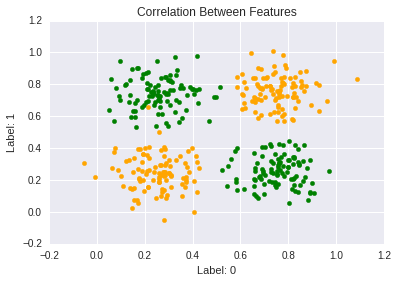

LinregressResult(slope=-0.89976622589430721, intercept=0.9538058008273953, rvalue=-0.84555090440154479, pvalue=7.2658470721476064e-56, stderr=0.040375046241073791)
LinregressResult(slope=0.88625348540369464, intercept=0.052272940306311688, rvalue=0.86757012748545947, pvalue=5.585588732177892e-62, stderr=0.036103741500689485)
0.505898464446
0.263437232544
0.500627217682
0.269110424772
0.500326292212
0.261054142566
0.503629101168
0.277792501182


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c768e6850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5c76cb9d50>]], dtype=object)

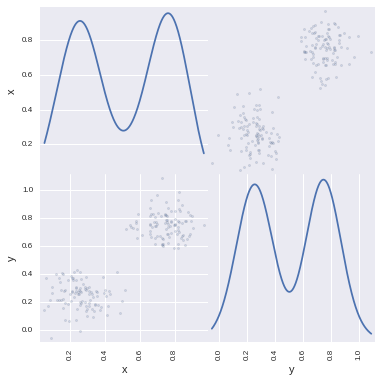

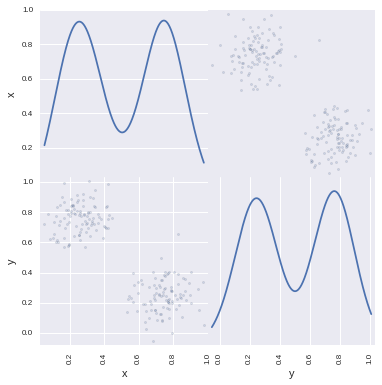

In [20]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix

print "Loading Testing/Training Data:"
(data_0_x,data_0_y,data_1_x,data_1_y)= get_feature_arrays('XOR')
plot_labeled_data(data_0_x,data_0_y,data_1_x,data_1_y)
print st.linregress(data_1_x,data_1_y)
print st.linregress(data_0_x,data_0_y)
# Concatenate both arrays for x and y to check for correlation (there is obviously corellation)

df_0 = pd.DataFrame({'x':data_0_x,'y':data_0_y})
df_1 = pd.DataFrame({'x':data_1_x,'y':data_1_y})

# Statistics
data_0_x_mean = data_0_x.mean()
data_0_x_std_dev = data_0_x.std()
data_0_y_mean = data_0_y.mean()
data_0_y_std_dev = data_0_y.std()

data_1_x_mean = data_1_x.mean()
data_1_x_std_dev = data_1_x.std()
data_1_y_mean = data_1_y.mean()
data_1_y_std_dev = data_1_y.std()


# print "Loading XOR Data:"
# (data_0_x,data_0_y,data_1_x,data_1_y)= get_feature_arrays('XOR')
# plot_labeled_data(data_0_x,data_0_y,data_1_x,data_1_y)

# Show 'em
print data_0_x_mean
print data_0_x_std_dev
print data_0_y_mean
print data_0_y_std_dev

print data_1_x_mean
print data_1_x_std_dev
print data_1_y_mean
print data_1_y_std_dev

scatter_matrix(df_0, alpha=0.2, figsize=(6, 6), diagonal='kde')
scatter_matrix(df_1, alpha=0.2, figsize=(6, 6), diagonal='kde')

# Edit This Code:
I tried many different means of testing the relationship of the input variables to the output variables. However, without being able to read the classifier, its difficult to know what to change. We obviously have a case where a model is overtrained. Though I made some attempts to deobfiscate the classifier, this was not fruitful, and I stopped due to a low return on investment in time.

So far, my best guess is that the input data is slightly clusterd, and also correllated, so we get a really excellent training error, and a bad testing error. By removing one of the variables, we seem to get improvement, however, I would not trust the imporvement without proper cross-validation.

I cannot effectively employ cross-validation without modifying the "plumbing" portion of the code - though I could just as easily make several training/testing files with data that has been left out. I felt like this was against the spirit of the activity, so I did not pursue this route.

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import mnbayes as classifier
import numpy as np
import random as rand
import seaborn
from math import log
from math import fabs
from math import sqrt
from math import exp

class feature_engineering:

    # original "bad" methods
    def predict_0(self,input):
        return classifier.predict(input)
    
    def train_0(self,input,output):
        return classifier.train(input,output)
    
    # Option 1 - My solution - Default - Obtains 70% accuracy 
    def predict_1(self,input):
        input[0] = 0.5
        return classifier.predict(input)
    
    def train_1(self,input, output):
        input[0] = 0.5
        classifier.train(input, output)

    # Option 2 - Multiply Features Together to account for correlation
    # Decreases testing uncertainty to 30%
    def predict_2(self,input):
        # Test for correlation of the features
        input[0] = input[0]*input[1]
        input[1] = 1
        return classifier.predict(input)
    def train_2(self,input, output):
        input[0] = input[0]*input[1]
        input[1] = 1

        classifier.train(input, output)

    # Option 3 - Log of both features
    # Does not perform well
    def predict_3(self,input):
        input[0] = log(fabs(input[0])+1.)
        input[1] = log(fabs(input[1])+1.)
        return classifier.predict(input)

    def train_3(self,input, output):
        input[0] = log(fabs(input[0])+1.0)
        input[1] = log(fabs(input[1])+1.0)
        classifier.train(input, output)

    #Option 4 - Scale Features - Obtains 50% accuracy (no better than random)
    #This tells us that right now our classifier is scale dependant.
    def predict_4(self,input):
        input[0] = 1000.0*input[0]
        input[1] = 1000.0*input[1]
        return classifier.predict(input)

    def train_4(self,input, output):
        input[0] = 1000.0*input[0]
        input[1] = 1000.0*input[1]
        classifier.train(input, output)

    # Option 5 - Optimal Solution 1 (Sampling)
    def predict_5(self, input):
        # Trials will contain the classifications for points which are in 
        # a 0.2 neighborhood of the input sample - the return value is a number
        # either above or below 0.5, but very close
        
        # in the plumbing section, we get better performance by sampling the classification
        # of 100 nearby points 
        trials = [classifier.predict([np.random.normal(input[0], .02), np.random.normal(input[1], .02)]) for _ in range(100)]
        return sum(trials) / 100.0

    def train_5(self, input, output):
        classifier.train(input, output)

    # Option 6 -Optimal Solution 2
    # This solution is sneakier. It suggests that the data is not scaled appropriately
    # It must have been a result of the classification algorithm - there must have been a local 
    # minima to classificaiton error as a funciton of binsize
    def predict_6(self,input):
        binsize = 10.2
        input = [x/binsize for x in input]
        return classifier.predict(input)

    def train_6(self,input, output):
        binsize = 10.2
        input = [x/binsize for x in input]
        classifier.train(input, output)
    
    def train(self,input,output,option):
        '''
        Selects which model to use based on option
        '''
        if option == 0:
            return self.train_0(input,output)
        elif option == 1:
            return self.train_1(input,output)
        elif option == 2:
            return self.train_2(input,output)
        elif option == 3:
            return self.train_3(input,output)
        elif option == 4:
            return self.train_4(input,output)
        elif option == 5:
            return self.train_5(input,output)
        elif option == 6:
            return self.train_6(input,output)
        else:
            return self.train_0(input,output)
    
    def predict(self,input,option):
        '''
        Selects which model to use based on option
        '''
        if option == 0:
            return self.predict_0(input)
        elif option == 1:
            return self.predict_1(input)
        elif option == 2:
            return self.predict_2(input)
        elif option == 3:
            return self.predict_3(input)
        elif option == 4:
            return self.predict_4(input)
        elif option == 5:
            return self.predict_5(input)
        elif option == 6:
            return self.predict_6(input)
        else:
            return self.predict_0(input)


## Exploraiton of Option 4 Method

In [69]:
array_test = [np.random.normal(0.234, .02), np.random.normal(0.2145, .02)]
print array_test

[0.276887851049161, 0.1994561106972569]


## Exploraiton of Option 5 Method

In [70]:
array_test = [np.random.normal(0.234, .02), np.random.normal(0.2145, .02)]
print array_test

[0.20032848687269295, 0.16067239957982893]


# Run The Classifier
Note that I have wrapped the "do not modify" portion of the code into a function, as well as added a return value so that the classifier's performance can be studied over a number of trials. The code has not been changed meaningfully, in the spirit of the problem. Additionally, I have moved the 'reset' into this funciton to get a properly clean slate for many iterations of the code.

* Non-meaningful changes include:
    * wrapped into function
    * added an option to turn off printing
    * added return values to allow for study many iterations of classifier

In [3]:
def run_classifier(DEBUG_VISUALIZATION = True, verbose = True, PROBLEM = "SQUASHED", option = 0):
    classifier.reset()
    fe = feature_engineering()
    if verbose: print "Reading input"

    file_stream = open(PROBLEM, 'r')
    full_text = file_stream.read();

    train_set = []
    test_set = []

    lines = full_text.split("\n")
    for line in lines:
        if line:
            input_output = line.split(":")

            # Get just the two values
            input = input_output[0].split(",")
            
            # Convert the values to floats. Lambda applies float(x) to each
            # x in interable 'input'
            input = map(lambda x : float(x), input)

            # output contains the classification for the input
            output = float(input_output[1])    
            
            # example_dest = [ ([<float>feature_1,<float>feature_2],<float> label) ... ]
            # pipes a labled feature set to either the testing, or the training data set
            # depending on whether or not rand.randint(0,1) yields 0 or 1.
            example_dest = test_set if rand.randint(0, 1) == 1 else train_set
            example_dest.append((input, output))

    if verbose: print "Training..."
    for x, y in train_set:
        fe.train(x,y,option)
        # train([x for x, y in train_set], [y for x, y in train_set])

    if verbose: print "Predicting..."
    correct = 0
    # xrange is more 'efficienct' than range for large lists.
    # train_set[i][0] -> a feature set
    # train_set[i][1] -> the label for that feature set
    
    for i in xrange(len(train_set)):
        # predict(train_set[i][0]) + 0.5 gives us a number between 0.5 and 1.5
        # we truncate it to a label with int, which cuts off anything after
        # the decimal place.
        if int(fe.predict(train_set[i][0],option) + .5) == train_set[i][1]:
            correct += 1
    train_error = 100 - 100.0 * correct / len(train_set)
    if verbose: print "Train:", str(train_error) + "% error"

    correct = 0
    for i in xrange(len(test_set)):
        if int(fe.predict(test_set[i][0],option) + .5) == test_set[i][1]:
            correct += 1
    test_error = 100 - 100.0 * correct / len(test_set)
    if verbose: print "Test:", str(test_error) + "% error"

    if DEBUG_VISUALIZATION:
        if verbose: print "Drawing...\n\n"

        # Draw the color background grid
        GRID_MAX = 1.2
        GRID_MIN = -.2
        GRID_DELTA = .02

        GRID_MAX += GRID_DELTA
        grid_x, grid_y = np.meshgrid(np.arange(GRID_MIN, GRID_MAX, GRID_DELTA), np.arange(GRID_MIN, GRID_MAX, GRID_DELTA))
        colors = np.zeros((len(grid_x), len(grid_y)))
        for x in xrange(len(grid_x)):
            for y in xrange(len(grid_y)):
                colors[x][y] = fe.predict([grid_x[x][y], grid_y[x][y]],option)
        cdict = {'red': ((0.0, 1.0, 1.0),
                         (1.0, 0.5, 0.5)),
                 'green': ((0.0, 0.5, 0.5),
                           (1.0, 0.5, 0.5)),
                 'blue': ((0.0, 0.5, 0.5),
                          (1.0, 1.0, 1.0))}
        plt.register_cmap(name='muted_rdbl', data=cdict)
        plt.pcolormesh(grid_x, grid_y, colors, cmap='muted_rdbl')

        # Scatter plot of examples
        input = [u for u, v in test_set]
        output = np.array([v for u, v, in test_set])
        x = np.array([u[0] for u in input])
        y = np.array([u[1] for u in input])
        colors = ['r', 'b']
        color_values = [colors[int(c) % len(colors)] for c in output]
        plt.scatter(x, y, color=color_values)
        plt.show()
    return (train_error,test_error)

## Original

Reading input
Training...
Predicting...
Train: 1.43442622951% error
Test: 46.6796875% error
Drawing...




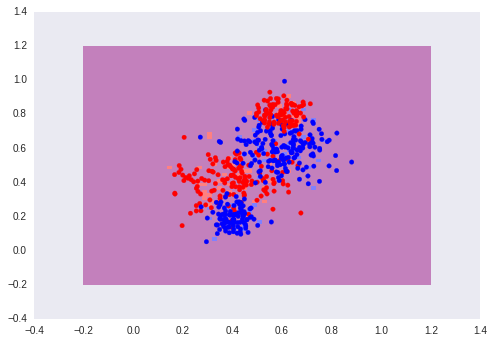

(1.4344262295081904, 46.6796875)

In [4]:
run_classifier(True,True,'SQUASHED',0)

## My Solution Visualization

Reading input
Training...
Predicting...
Train: 24.254473161% error
Test: 25.3521126761% error
Drawing...




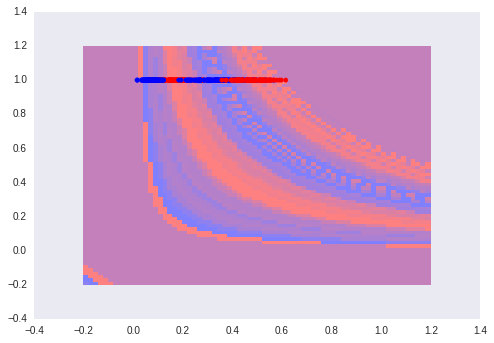

(24.2544731610338, 25.352112676056336)

In [11]:
run_classifier(True,True,'SQUASHED',2)

## Model 5 Visualization - Sampling
Reduction overtraining using sampling

Reading input
Training...
Predicting...
Train: 10.3313840156% error
Test: 15.4004106776% error
Drawing...




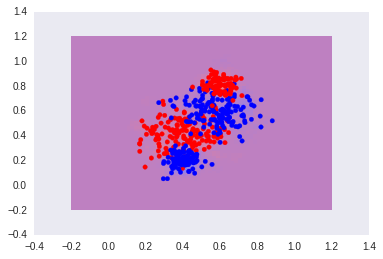

(10.331384015594537, 15.40041067761807)

In [99]:
run_classifier(True,True,'SQUASHED',5)

## Model 5 Visualization
Reduction of overtraining via binning data prior to classification

Reading input
Training...
Predicting...
Train: 12.5% error
Test: 15.6746031746% error
Drawing...




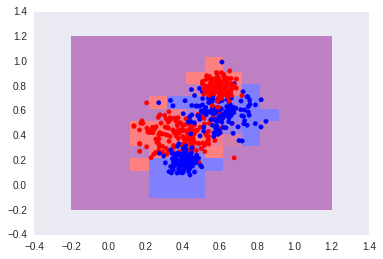

(12.5, 15.674603174603178)

In [100]:
run_classifier(True,True,'SQUASHED',6)

## Now run 100 times (this frame was run with default settings)

In [90]:
training_errors = []
testing_errors = []
for i in range(0,100):
    (train_error,test_error) = run_classifier(False,False,'SQUASHED',1)
    training_errors.append(train_error)
    testing_errors.append(test_error)

# Understanding Current Performance
Here, we look at the classifier's output for 100 trials where we check the distribution of the training error, and the testing error.

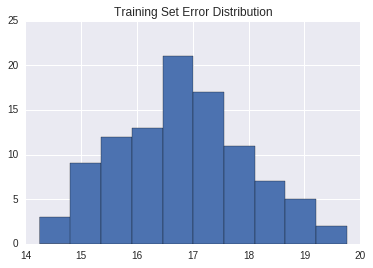

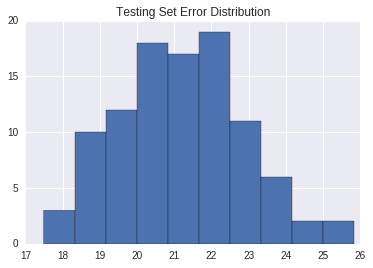

training mean error: 16.825840879
testing mean error: 21.1988332271


In [91]:
test_errs = np.array(testing_errors)
train_errs = np.array(training_errors)
plt.hist(train_errs)
plt.title('Training Set Error Distribution')
plt.show()
plt.hist(np.array(test_errs))
plt.title('Testing Set Error Distribution')
plt.show()

print 'training mean error:',np.mean(train_errs)
print 'testing mean error:',np.mean(test_errs)